In [1]:
import pickle
import dill
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
with open('clans.pkl', 'rb') as df:
    clans = dill.loads(pickle.load(df))

In [3]:
def init():
    for i in clans:
        circles.append(plt.Circle((i.history['x'][0], i.history['y'][0]), i.history['radius'][0], color=i.color, label=f'Clan {i}'))
    for circle in circles:
        ax.add_patch(circle)
    return tuple(circles)

In [4]:
def update_circle(num, data, ax):
    num *= 3
    for i in range(0, len(clans)):
        circles[i].center = (clans[i].history['x'][num], clans[i].history['y'][num])
        circles[i].radius = clans[i].history['radius'][num]
    return tuple(circles)

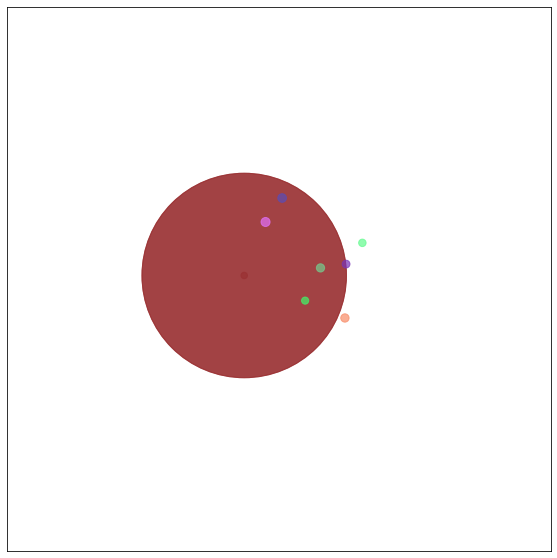

In [5]:
circles = []

np.random.seed(19680801)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)


plt.gca().set_aspect('equal', adjustable='box')
data = np.random.rand(2, 25)
plt.xlim(-100, 200)
plt.ylim(-100, 200)
line_ani = animation.FuncAnimation(fig, update_circle, frames=int(len(clans[0].history['radius'][:2000])/2), init_func=init, fargs=(data, ax),
                                   interval=30, blit=False)
line_ani.save('animation.mp4', writer=animation.writers['ffmpeg'](fps=50), dpi=100)